In [1]:
import math
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt


def get_np_image(img_path: str) -> np.ndarray:

    raw_image: Image.Image = Image.open(img_path)
    resized_image: Image.Image = raw_image.resize(
        (600, 900), Image.Resampling.LANCZOS)
    np_image: np.ndarray = np.array(resized_image)

    return np_image


def convert_to_grayscale(np_image: np.ndarray) -> np.ndarray:

    # Some magic sourcery that turns image into grayscale.
    np_gray_image = np.dot(np_image[..., :3], [0.2989, 0.5870, 0.1140])

    return np_gray_image


def transform(image_gray_array: np.ndarray, np_image: np.ndarray, pixel_size: int) -> None:

    pallete: dict[str, int] = {
        "blue": 0,
        "red": 0,
        "orange": 0,
        "yellow": 0,
        "white": 0
    }

    a: int = 0
    b: int = pixel_size+1
    c: int = 1
    d: int = pixel_size+1

    row_loop = int(600/pixel_size) + 1
    column_loop = int(900/pixel_size) + 1

    # Loop through all the pixels inside each grid and get its grayscale color code.
    # The size of the grid depends on the pixel_size.
    # Compare the pixel's grayscale color code to the horizontal bar graph in readme.
    # Find the most occurance (The dominant color) in each grid, then replace the entire pixel in the grid with the respective color.
    for _column in range(row_loop):

        for _row in range(column_loop):

            data: np.ndarray = image_gray_array[a:b, c:d]

            for group_data in data:

                for list_data in group_data:

                    if int(list_data) > 0 and int(list_data) <= 91:
                        pallete["blue"] += 1
                    if int(list_data) > 91 and int(list_data) <= 121:
                        pallete["red"] += 1
                    if int(list_data) > 121 and int(list_data) <= 151:
                        pallete["orange"] += 1
                    if int(list_data) > 151 and int(list_data) <= 180:
                        pallete["yellow"] += 1
                    if int(list_data) > 180 and int(list_data) <= 255:
                        pallete["white"] += 1
                    else:
                        continue

                dominant = max(pallete, key=pallete.get)  # type: ignore
                if dominant == "blue":
                    np_image[a:b, c:d] = np.array([0, 0, 255, 255])
                if dominant == "red":
                    np_image[a:b, c:d] = np.array([255, 0, 0, 255])
                if dominant == "orange":
                    np_image[a:b, c:d] = np.array([255, 165, 0, 255])
                if dominant == "yellow":
                    np_image[a:b, c:d] = np.array([255, 255, 0, 255])
                if dominant == "white":
                    np_image[a:b, c:d] = np.array([255, 255, 255, 255])

                # Reset the dictionary value for the next location.
                pallete["blue"] = 0
                pallete["red"] = 0
                pallete["orange"] = 0
                pallete["yellow"] = 0
                pallete["white"] = 0

            a, b = a-a+b, b+pixel_size

        a, b = 1, pixel_size+1
        c, d = c-c+d, d+pixel_size


def draw(np_image: np.ndarray, pixel_size: int) -> None:

    plt.figure(figsize=(40, 40))
    plt.xticks(range(0, 600, pixel_size))
    plt.yticks(range(0, 900, pixel_size))
    plt.grid(True, "both", linewidth="3", color='black')
    plt.imshow(np_image)


def steps(np_image: np.ndarray, pixel_size: int) -> None:

    area: int = pixel_size*3
    rubric: int = 1
    row: int = 1
    a, b = 900-area, 900
    c, d = 1, area
    print(area, pixel_size)

    while a >= 0:

        while d < 605:

            print("row: ", row)
            print("rubric: ", rubric)
            print("location:", a, b, c, d)
            step = np_image[a:b, c:d]
            plt.xticks(range(0, area+pixel_size, pixel_size))
            plt.yticks(range(0, area+pixel_size, pixel_size))
            plt.grid(True, "both", linewidth="3", color='black')
            plt.imshow(step)
            plt.show()
            rubric += 1

            c, d = c-c+d, d+area

        row += 1
        c, d = 1, area
        b, a = b-b+a, a-area


def execute(img_path: str, pixel_size: int, show_steps: bool) -> None:

    np_image: np.ndarray = get_np_image(img_path=img_path)
    image_gray_array: np.ndarray = convert_to_grayscale(np_image=np_image)
    transform(image_gray_array=image_gray_array,
              np_image=np_image, pixel_size=pixel_size)
    draw(np_image, pixel_size)

    if show_steps:
        steps(np_image=np_image, pixel_size=pixel_size)

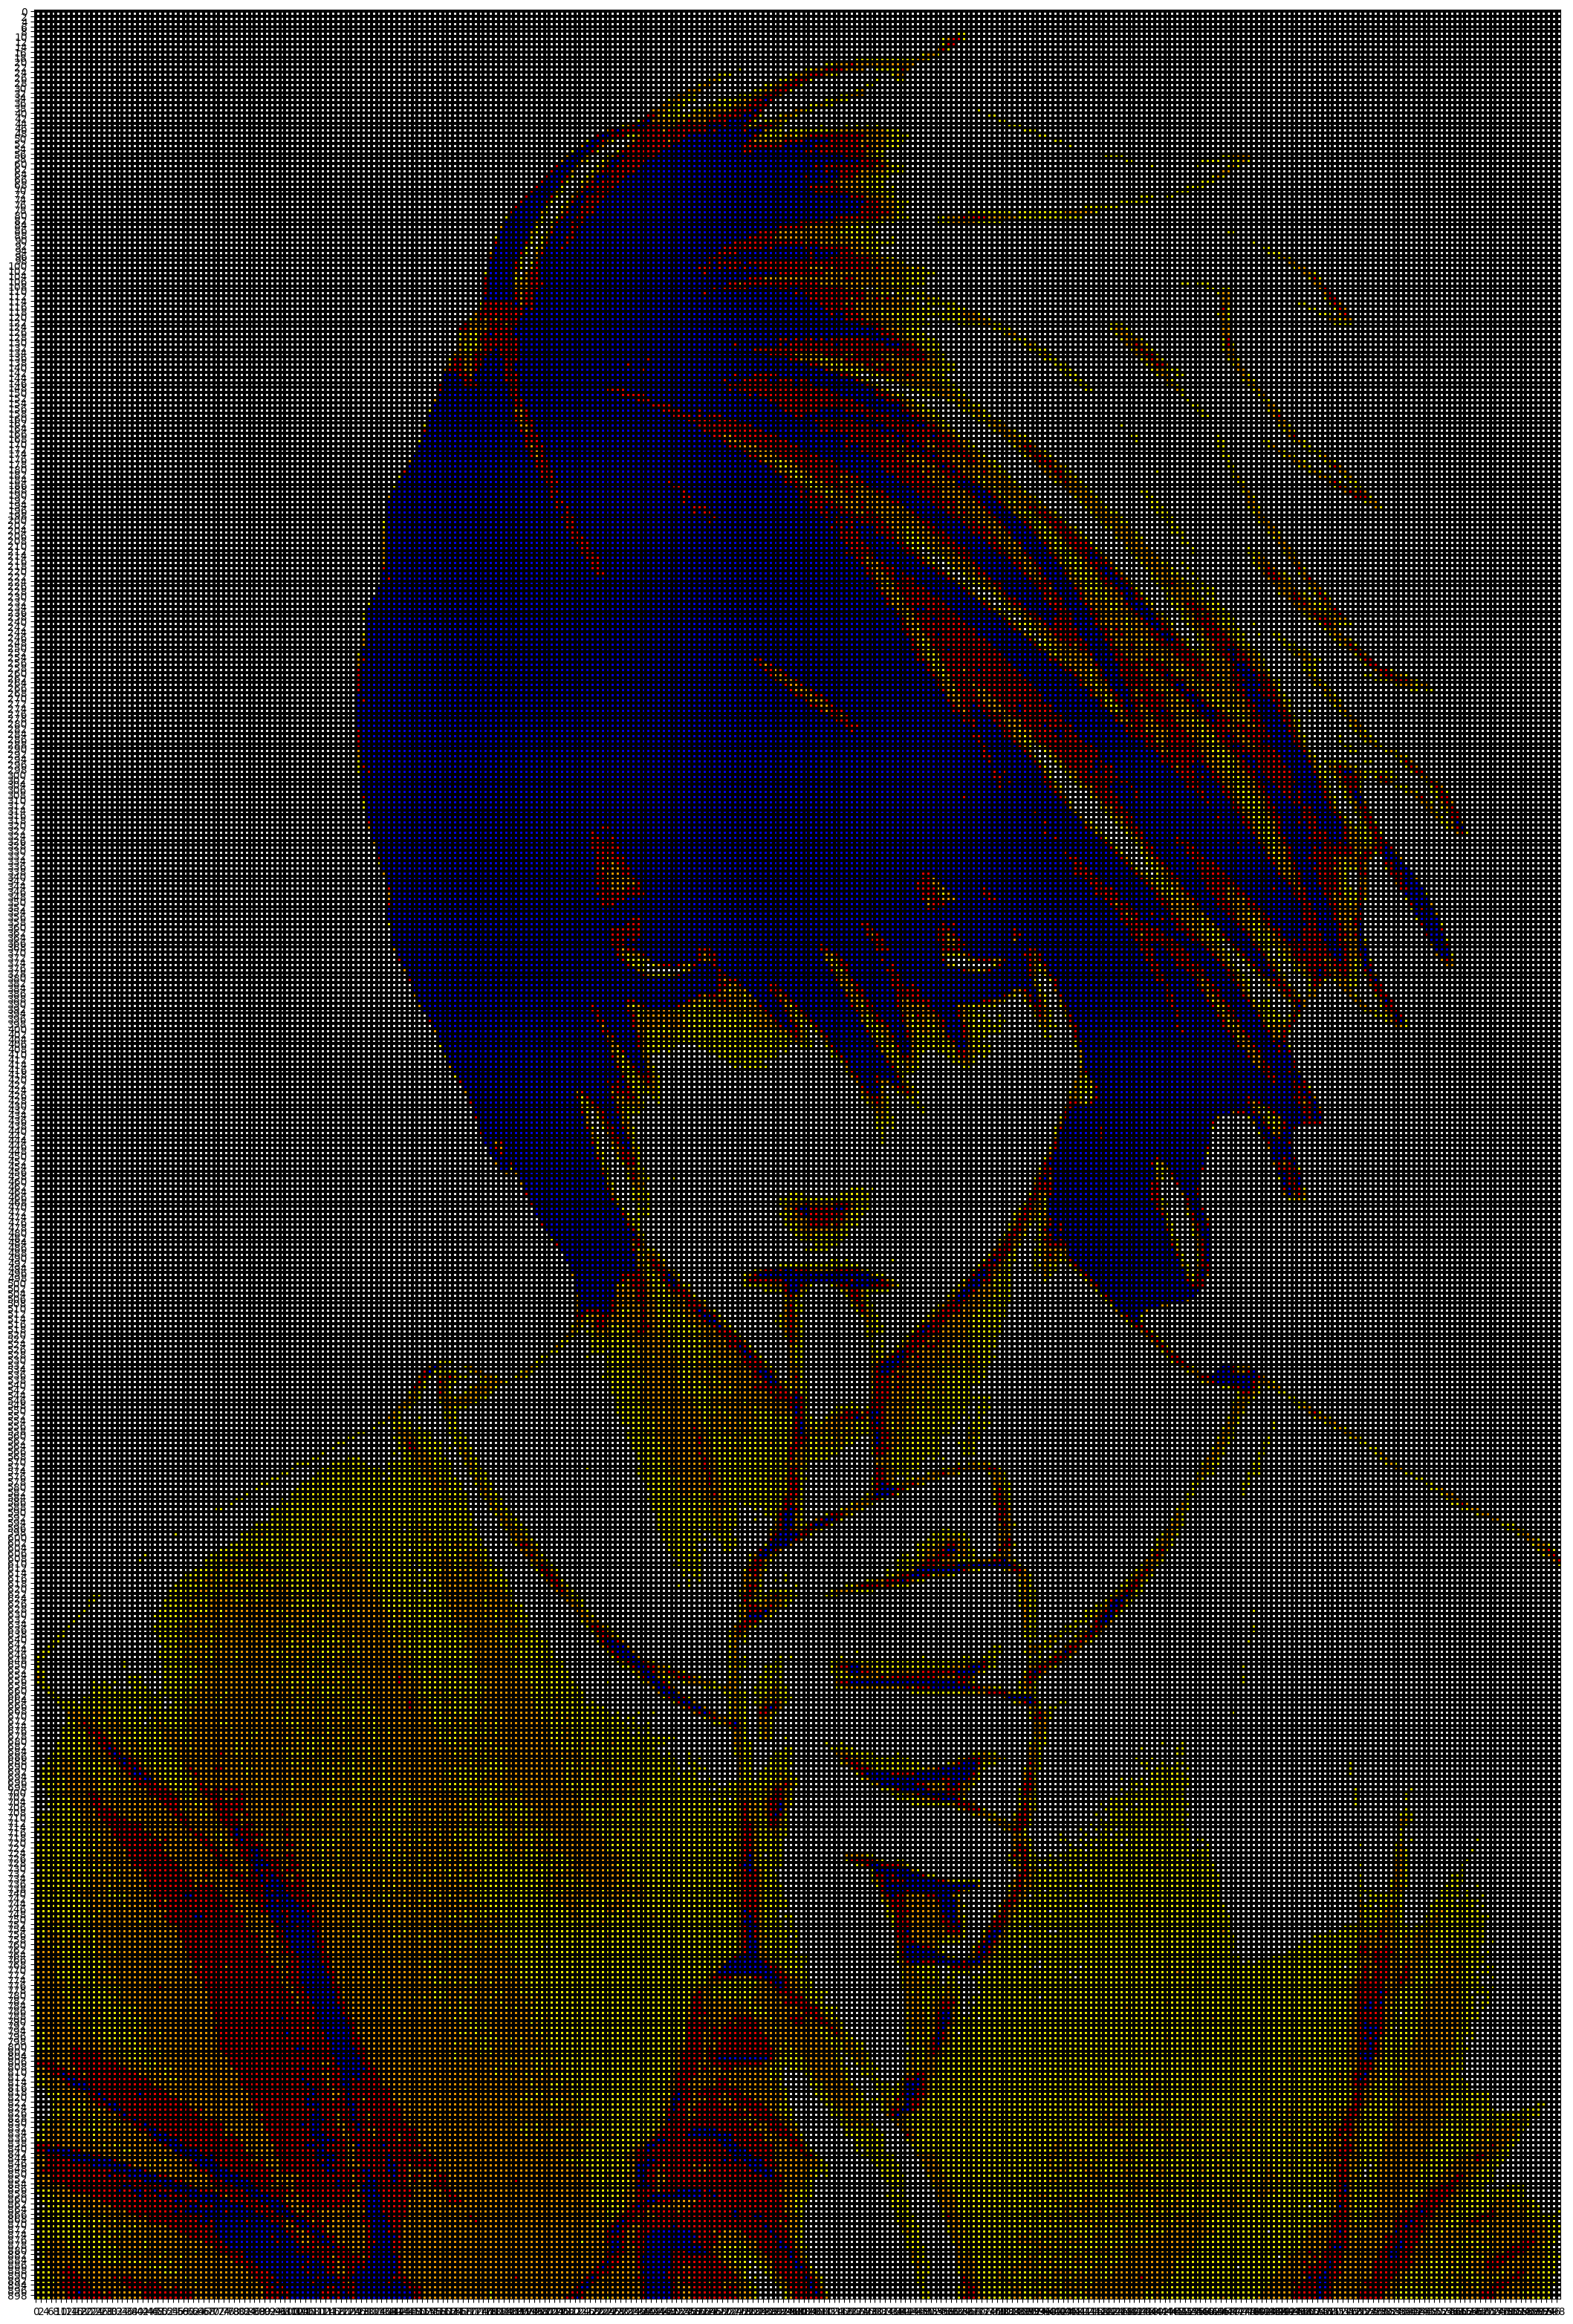

In [2]:
# NOTE: This only works with .PNG files!
img_path = "img/lawliet.png"
# NOTE: It is recommended to set pixel_size anywhere from 2 to 15. (Lower the better quality = more cubes required.)
pixel_size = 2
# NOTE: Show steps by steps on how to build the portrait. This will take long if pixel_size is small.
show_steps = False

execute(img_path=img_path, pixel_size=pixel_size, show_steps=show_steps)